### Bibliotecas

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

import scienceplots
plt.style.use('science')

### Lendo Dados

In [3]:
vars = [
    'DT',
    'NPHI',
    'RES',
    'RHOB',
]
paths = []
for v in vars:
    paths.append(os.path.join(os.getcwd(),'Outputs', f'DECOMP_{v}_FILT.pkl'))
    paths.append(os.path.join(os.getcwd(),'Outputs', f'FEATDEC_{v}_FILT.pkl'))
paths

['c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RHOB_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RHOB_FILT.pkl']

In [4]:
dfs=pd.DataFrame()
for p in paths:
    dfs = pd.concat([dfs,pd.read_pickle(p)], axis=0)
dfs

,MODEL,R2_TR,R2_TE,MAE_TR,MAE_TE,MODEL_OBJ,IN,OUT,RMSE_TR,RMSE_TE
0,SVM.MLP,0.844872,0.847915,0.065208,0.061507,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085181,0.071883
1,SVM.PolyReg,0.843652,0.846300,0.065080,0.061619,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085515,0.072264
2,SVM.LinReg,0.846253,0.844257,0.064814,0.062311,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.084801,0.072742
3,SVM.XGBoost,0.860108,0.843387,0.061999,0.062693,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080890,0.072945
4,SVM.ExtraTrees,0.860460,0.842629,0.061393,0.062784,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080788,0.073121
...,...,...,...,...,...,...,...,...,...,...
19,AdaBoostRegressor,0.889069,0.643324,0.051402,0.071803,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.059845,0.088468
20,XGBoost(DEC),0.984780,0.640055,0.016553,0.070281,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.022167,0.088872
21,AdaBoostRegressor(DEC),0.870081,0.583292,0.055865,0.080798,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.064764,0.095623
22,DecisionTree,0.960471,0.554287,0.026371,0.065496,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.035724,0.098895


In [5]:
df_results = dfs.sort_values('R2_TE', ascending=False).reset_index(drop=True)

In [6]:
def model_class(row):
    if 'DEC' in row['MODEL']:
        model_class = 'FEAT_DEC'
    elif '.' in row['MODEL']:
        model_class = 'ENSEMBLE'
    else:
        model_class = 'BASE'
    return model_class
def estim(row):
    if 'DEC' in row['MODEL']:
        estim = row['MODEL'].split('(')[0]
    elif '.' in row['MODEL']:
        estim = row['MODEL'].split('.')[0]
    else:
        estim = row['MODEL']
    return estim
def season_model(row):
    estim = None
    if '.' in row['MODEL']:
        estim = row['MODEL'].split('.')[1]
    return estim

In [7]:
df_results['CASE'] = df_results.apply(model_class, axis=1)
df_results['ESTIMATOR'] = df_results.apply(estim, axis=1)
df_results['SEASONAL'] = df_results.apply(season_model, axis=1)
df_results['ESTIMATOR'].value_counts()

ESTIMATOR
PolyReg              60
MLP                  60
SVM                  60
AdaBoostRegressor    60
ExtraTrees           60
LinReg               60
XGBoost              60
RandomForest         60
KNN                  60
DecisionTree         60
GradientBoosting     60
BaggingRegressor     60
Name: count, dtype: int64

In [8]:
df_results['CASE'].unique()

array(['FEAT_DEC', 'ENSEMBLE', 'BASE'], dtype=object)

In [9]:
remove_estimators = [
    # 'PolyReg',
    # 'MLP',
    # 'SVM',
    # 'AdaBoostRegressor',
    'ExtraTrees',
    # 'LinReg',
    # 'XGBoost',
    # 'RandomForest',
    'KNN',
    'DecisionTree',
    # 'GradientBoosting',
    'BaggingRegressor',
]

df_results = df_results[~df_results['ESTIMATOR'].isin(remove_estimators)]
df_results = df_results[~df_results['SEASONAL'].isin(remove_estimators)]


In [10]:
df_results.columns

Index(['MODEL', 'R2_TR', 'R2_TE', 'MAE_TR', 'MAE_TE', 'MODEL_OBJ', 'IN', 'OUT',
       'RMSE_TR', 'RMSE_TE', 'CASE', 'ESTIMATOR', 'SEASONAL'],
      dtype='object')

Removendo duplicatas do caso base que ficou repetido

In [11]:
df_results['CASE'].value_counts()

CASE
ENSEMBLE    256
BASE         64
FEAT_DEC     32
Name: count, dtype: int64

In [12]:
df_results = df_results.drop_duplicates(subset=['MODEL','IN', 'OUT','CASE'])
df_results['CASE'].value_counts()

CASE
ENSEMBLE    256
FEAT_DEC     32
BASE         32
Name: count, dtype: int64

Reordering columns

In [13]:
new_cols = [
    'CASE',
    'MODEL',
    'ESTIMATOR',
    'R2_TR',
    'R2_TE',
    'RMSE_TR',
    'RMSE_TE',
    # 'MAE_TR',
    # 'MAE_TE',
    'MODEL_OBJ',
    'IN',
    'OUT',
]
df_results = df_results[new_cols]
df_results

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
1,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,ENSEMBLE,SVM.MLP,SVM,0.844872,0.847915,0.085181,0.071883,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
3,ENSEMBLE,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,SVM.PolyReg,SVM,0.843652,0.846300,0.085515,0.072264,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
...,...,...,...,...,...,...,...,...,...,...
714,ENSEMBLE,LinReg.LinReg,LinReg,-10.093475,-8.139278,0.537548,0.465580,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
716,ENSEMBLE,MLP.MLP,MLP,-10.671665,-8.518276,0.551379,0.475135,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
717,ENSEMBLE,PolyReg.PolyReg,PolyReg,-13.231549,-8.717386,0.608849,0.480079,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
718,ENSEMBLE,PolyReg.PolyReg,PolyReg,-47.859033,-37.150219,1.511718,1.138493,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por classe

In [14]:
df_sum_class = df_results.drop_duplicates(subset=['CASE', 'OUT'])
df_sum_class = df_sum_class.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_class

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por modelo

In [15]:
df_sum_model = df_results.drop_duplicates(subset=['ESTIMATOR', 'OUT'])
df_sum_model = df_sum_model.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_model

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,XGBoost.MLP,XGBoost,0.937864,0.794570,0.044789,0.067140,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,LinReg.AdaBoostRegressor,LinReg,0.875863,0.786024,0.063306,0.068522,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,BASE,GradientBoosting,GradientBoosting,0.988800,0.760834,0.019015,0.072443,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
6,BASE,RandomForest,RandomForest,0.975829,0.736613,0.027935,0.076023,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
7,BASE,AdaBoostRegressor,AdaBoostRegressor,0.889069,0.643324,0.059845,0.088468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
9,FEAT_DEC,MLP(DEC),MLP,0.958814,0.788846,0.032753,0.070768,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG


### Plotando

In [16]:
# dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby('OUT')
# dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby(['CASE','OUT'])
dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby(['CASE','OUT'])
dfbest = dfbest.head(5)
dfbest

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,ENSEMBLE,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,ENSEMBLE,MLP.AdaBoostRegressor,MLP,0.938606,0.845082,0.044521,0.058304,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,MLP.PolyReg,MLP,0.929074,0.844309,0.047852,0.058449,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,ENSEMBLE,MLP.SVM,MLP,0.923000,0.843502,0.049859,0.058601,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
17,BASE,MLP,MLP,0.925120,0.806355,0.049168,0.065185,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
19,FEAT_DEC,MLP(DEC),MLP,0.942623,0.804308,0.043040,0.065529,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
22,BASE,SVM,SVM,0.883563,0.799980,0.061312,0.066250,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB


In [17]:
myPalette = ['r', '0.3', '#4169E1']

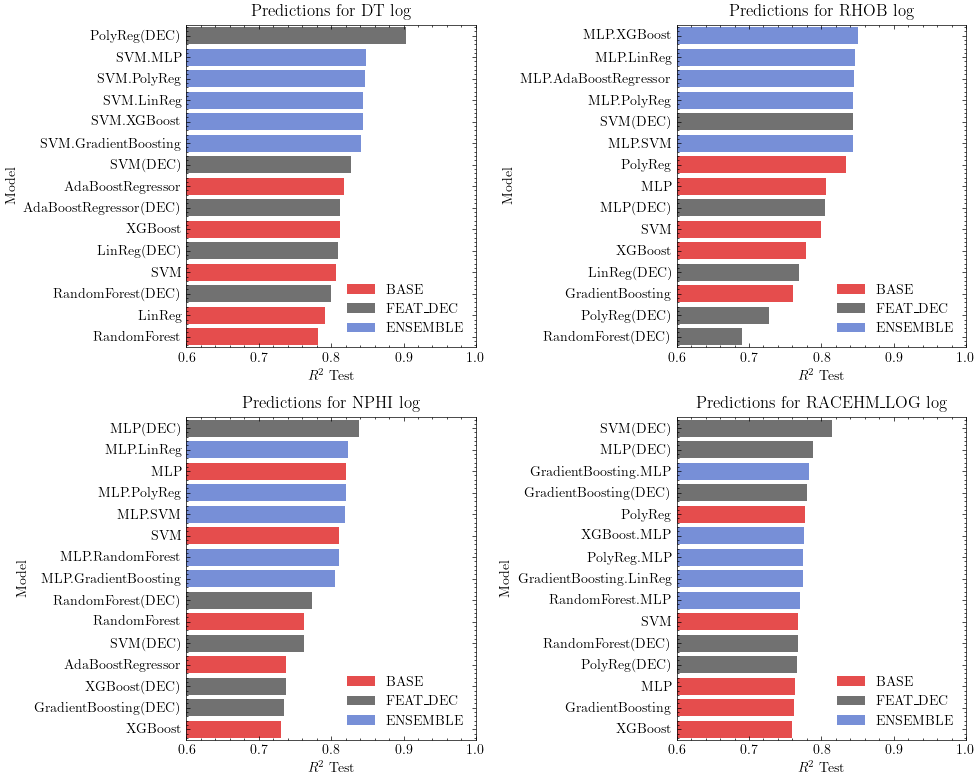

In [18]:
lim=(0.6,1)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

# fig.suptitle('')

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=dfbest[dfbest['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Model')
    ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_model_5bestPerClass_short.pdf', format='pdf')

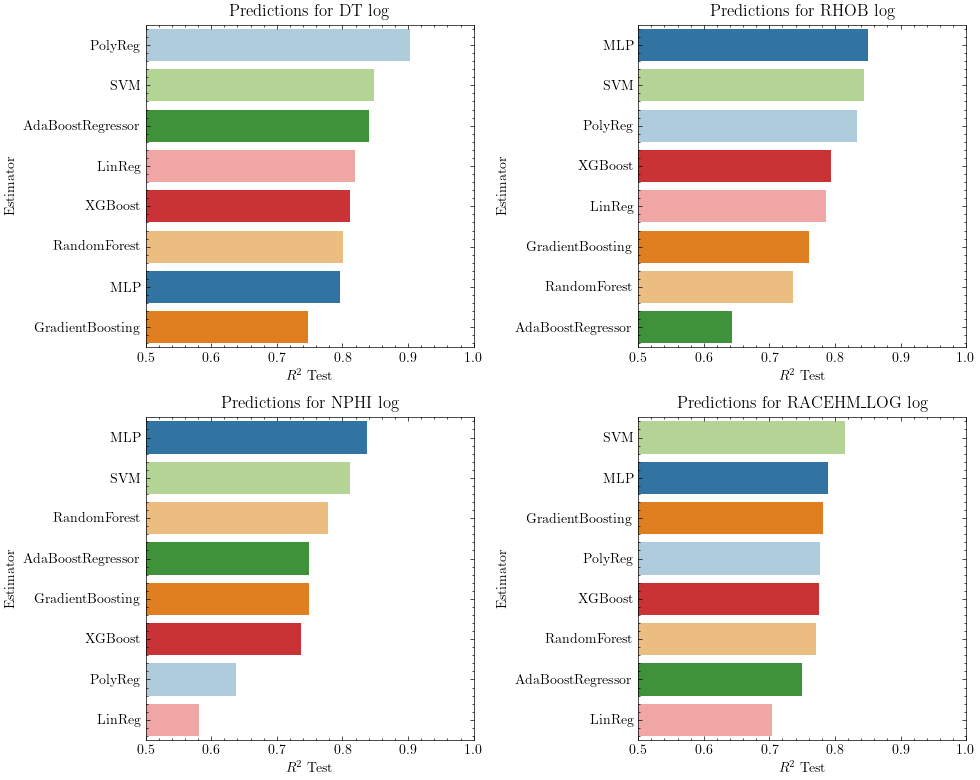

In [19]:
lim=(0.5,1)
# lim=(0.5,.91)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

for i, var in enumerate(df_results['OUT'].unique()):
    # sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='ESTIMATOR', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='ESTIMATOR', hue='ESTIMATOR', hue_order=df_results['ESTIMATOR'].unique(), ax=ax[i], palette='Paired');
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Estimator')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_estimator_short.pdf', format='pdf')

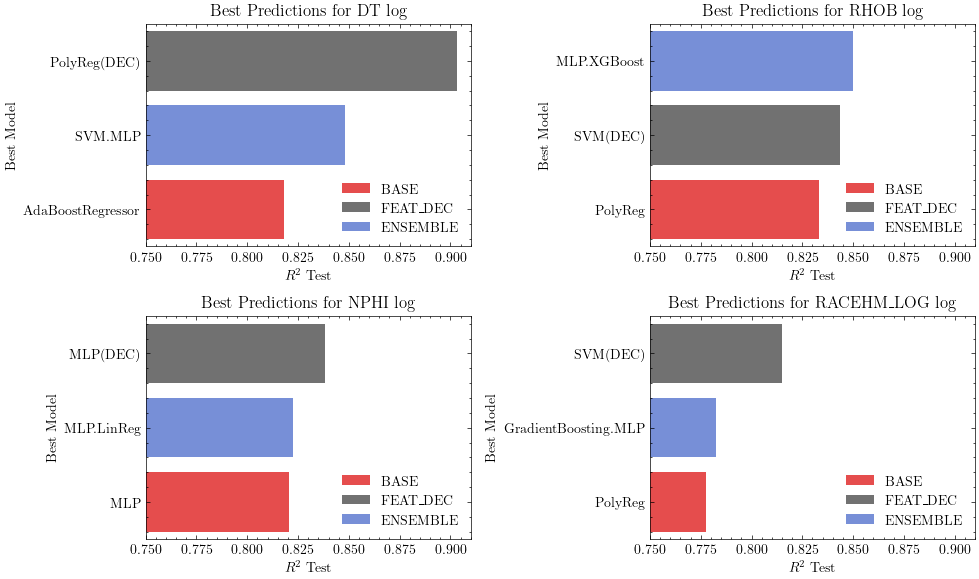

In [20]:
lim=(0.75,0.91)
figsize = (10,6)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_class[df_sum_class['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], palette=myPalette, hue_order=dfbest['CASE'].unique()[::-1], alpha=0.8);
    ax[i].set_title(f'Best Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Best Model')
    ax[i].legend(loc='lower right')
    # if i==3: ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_best_models_short.pdf', format='pdf')

Predições dos melhores casos

In [21]:
df = pd.read_csv('./Data/volve_preproc.csv')
df.shape

(23733, 10)

In [22]:
def decomp(X_te, period=10):
    extrapolate_trend = 5
    return seasonal_decompose(X_te, period=period, extrapolate_trend=extrapolate_trend)

In [23]:
df_results['OUT'].unique().tolist()

['DT', 'RHOB', 'NPHI', 'RACEHM_LOG']

In [24]:
df_results.columns

Index(['CASE', 'MODEL', 'ESTIMATOR', 'R2_TR', 'R2_TE', 'RMSE_TR', 'RMSE_TE',
       'MODEL_OBJ', 'IN', 'OUT'],
      dtype='object')

In [25]:
df_results.groupby(['IN', 'OUT']).head(1)[['IN','OUT']]

,IN,OUT
0,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
1,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
22,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
55,DT.GR.NPHI.RHOB.SW,RACEHM_LOG


In [26]:
data_dict = {
    'DT' :  [],
    'RHOB': [],
    'NPHI': [],
    'RACEHM_LOG': [],
}

# DT
n=3
df2 = df[::n]
df_filt = df2.dropna()
test_wells = ['15/9-F-1 B']
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['GR','NPHI','RHOB','PHIF','RACEHM_LOG']
output = ['DT']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['DT'].append(X_te)
data_dict['DT'].append(X_te_dec)
data_dict['DT'].append(X2_te)
data_dict['DT'].append(y_te)
data_dict['DT'].append(test_df['MD'])

# NPHI
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['CALI','DT','GR','RHOB','PHIF','RACEHM_LOG']
output = ['NPHI']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['NPHI'].append(X_te)
data_dict['NPHI'].append(X_te_dec)
data_dict['NPHI'].append(X2_te)
data_dict['NPHI'].append(y_te)
data_dict['NPHI'].append(test_df['MD'])


# RACEHM_LOG
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','RHOB','SW']
output = ['RACEHM_LOG']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RACEHM_LOG'].append(X_te)
data_dict['RACEHM_LOG'].append(X_te_dec)
data_dict['RACEHM_LOG'].append(X2_te)
data_dict['RACEHM_LOG'].append(y_te)
data_dict['RACEHM_LOG'].append(test_df['MD'])

# RHOB
n=4
df2 = df[::n]
df_filt = df2.dropna()
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','SW','RACEHM_LOG']
output = ['RHOB']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RHOB'].append(X_te)
data_dict['RHOB'].append(X_te_dec)
data_dict['RHOB'].append(X2_te)
data_dict['RHOB'].append(y_te)
data_dict['RHOB'].append(test_df['MD'])

PLots

In [27]:
df_sum_class

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


In [28]:
def y_pred(row):
    if row['CASE'] == 'ENSEMBLE':
        y_pred = row['MODEL_OBJ'][0].predict(data_dict[row['OUT']][1].trend) + row['MODEL_OBJ'][1].predict(data_dict[row['OUT']][1].seasonal+data_dict[row['OUT']][1].resid)
    elif row['CASE'] == 'FEAT_DEC':
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][2])
    else:
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][0])
    return y_pred.ravel()

def y_test(row):
    return data_dict[row['OUT']][3].ravel()

def train_time(row):
    search = row['MODEL_OBJ']
    if row['CASE'] == 'ENSEMBLE':
        tt = search[0].cv_results_['mean_fit_time'][search[0].best_index_] + search[1].cv_results_['mean_fit_time'][search[1].best_index_]
    else:
        tt = search.cv_results_['mean_fit_time'][search.best_index_]
    return tt

In [29]:
df_sum_class['y_pred'] = df_sum_class.apply(y_pred, axis=1)
df_sum_model['y_pred'] = df_sum_model.apply(y_pred, axis=1)
df_results['y_pred'] = df_results.apply(y_pred, axis=1)

df_sum_model['y_test'] = df_sum_model.apply(y_test, axis=1)
df_sum_class['y_test'] = df_sum_class.apply(y_test, axis=1)
df_results['y_test'] = df_results.apply(y_test, axis=1)

df_sum_class['train_time'] = df_sum_class.apply(train_time, axis=1)
df_sum_model['train_time'] = df_sum_model.apply(train_time, axis=1)
df_results['train_time'] = df_results.apply(train_time, axis=1)
df_sum_class

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT,y_pred,y_test,train_time
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[0.45771955376311224, 0.447360316085328, 0.449...","[0.44560972888541794, 0.42920897021086635, 0.4...",0.678244
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[0.3819200679936834, 0.35854672653354025, 0.34...","[0.44560972888541794, 0.42920897021086635, 0.4...",0.025078
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[0.4337494027583047, 0.4271859918268128, 0.437...","[0.44560972888541794, 0.42920897021086635, 0.4...",0.002711
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.4255004286955377, 0.4220703834277182, 0.425...","[0.3104570041814525, 0.304873375846967, 0.2947...",0.017372
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.37224155599697734, 0.3706919867554916, 0.36...","[0.3104570041814525, 0.304873375846967, 0.2947...",1.851820
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.3489823267756298, 0.33662157471122267, 0.33...","[0.3104570041814525, 0.304873375846967, 0.2947...",0.002328
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5857069930542625, 0.5996601968801513, 0.605...","[0.4659057652911911, 0.4840503365525314, 0.528...",1.011227
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5192783283561934, 0.5445151645568689, 0.567...","[0.4659057652911911, 0.4840503365525314, 0.528...",1.573867
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5896119541744501, 0.6125950780993932, 0.623...","[0.4659057652911911, 0.4840503365525314, 0.528...",1.632815
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6008521766614161, 0.6233392866595034, 0.658...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.007272


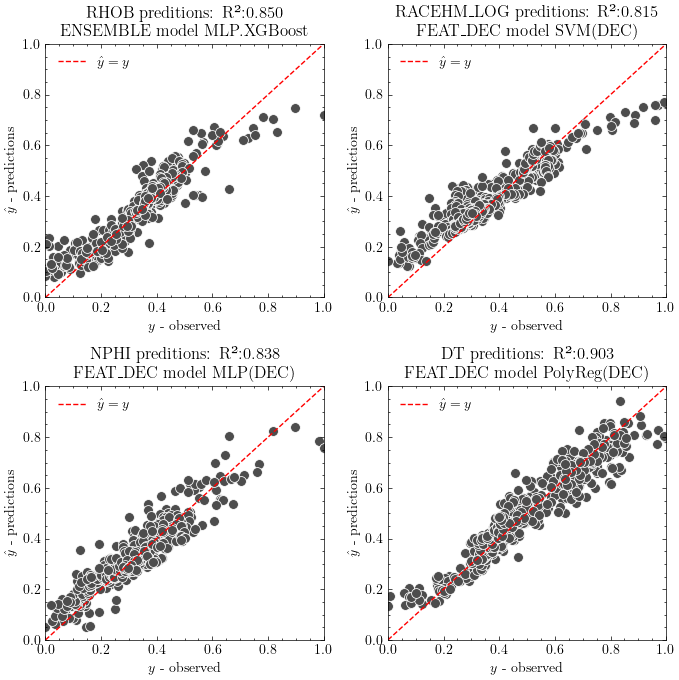

In [30]:
lim=(0,1)

fig, ax = plt.subplots(2,2, figsize=(7,7))

plt.subplot(221)
sns.scatterplot(x=df_sum_class.iloc[0,-2].ravel(), y=df_sum_class.iloc[0,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[0,'OUT']} preditions: R²:{df_sum_class.loc[0,'R2_TE']:.3f}\n {df_sum_class.loc[0,'CASE']} model {df_sum_class.loc[0,'MODEL']}")
plt.tight_layout()

plt.subplot(222)
sns.scatterplot(x=df_sum_class.iloc[3,-2].ravel(), y=df_sum_class.iloc[3,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[3,'OUT']} preditions: R²:{df_sum_class.loc[3,'R2_TE']:.3f}\n {df_sum_class.loc[3,'CASE']} model {df_sum_class.loc[3,'MODEL']}")
plt.tight_layout()

plt.subplot(223)
sns.scatterplot(x=df_sum_class.iloc[6,-2].ravel(), y=df_sum_class.iloc[6,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[6,'OUT']} preditions: R²:{df_sum_class.loc[6,'R2_TE']:.3f}\n {df_sum_class.loc[6,'CASE']} model {df_sum_class.loc[6,'MODEL']}")
plt.tight_layout()

plt.subplot(224)
sns.scatterplot(x=df_sum_class.iloc[9,-2].ravel(), y=df_sum_class.iloc[9,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[9,'OUT']} preditions: R²:{df_sum_class.loc[9,'R2_TE']:.3f}\n {df_sum_class.loc[9,'CASE']} model {df_sum_class.loc[9,'MODEL']}")
plt.tight_layout()

pass;
fig.savefig(f'./Images/crossplot_science_short.pdf', format='pdf')


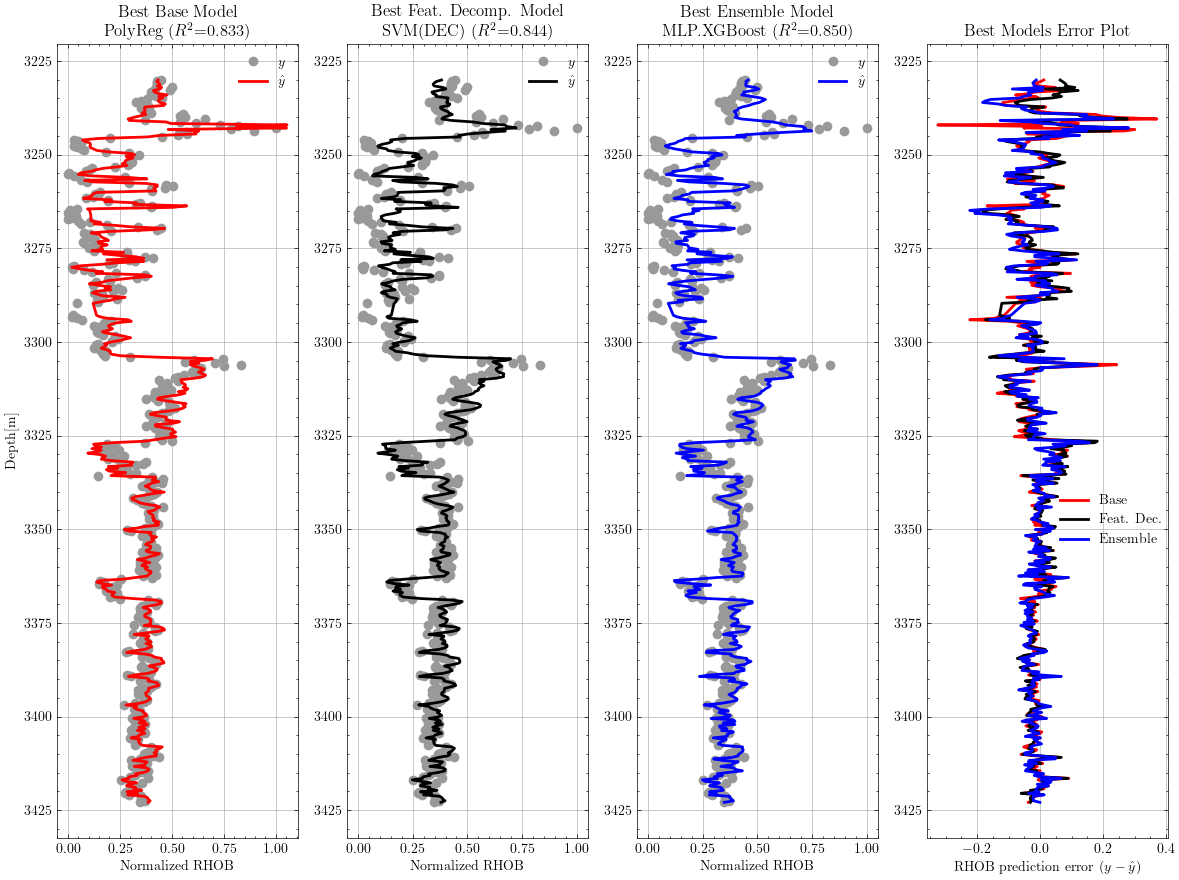

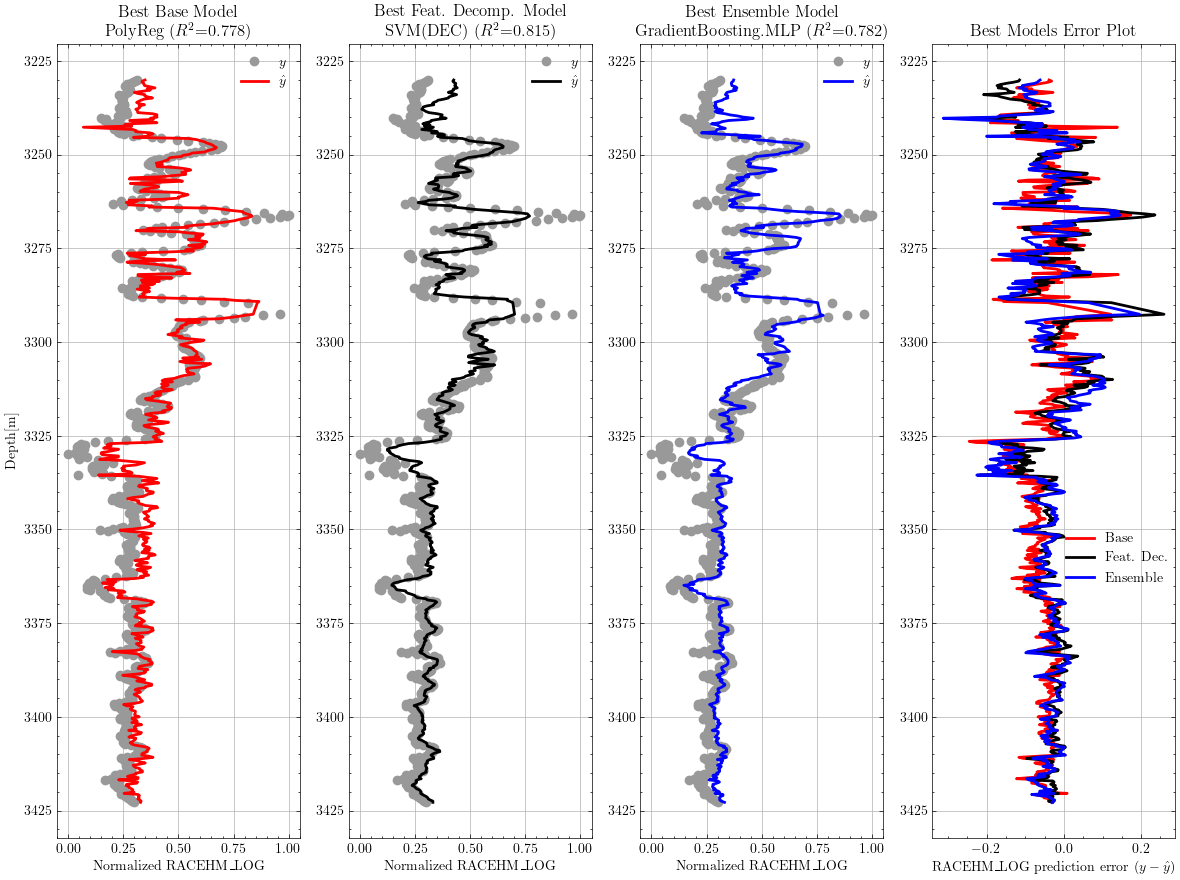

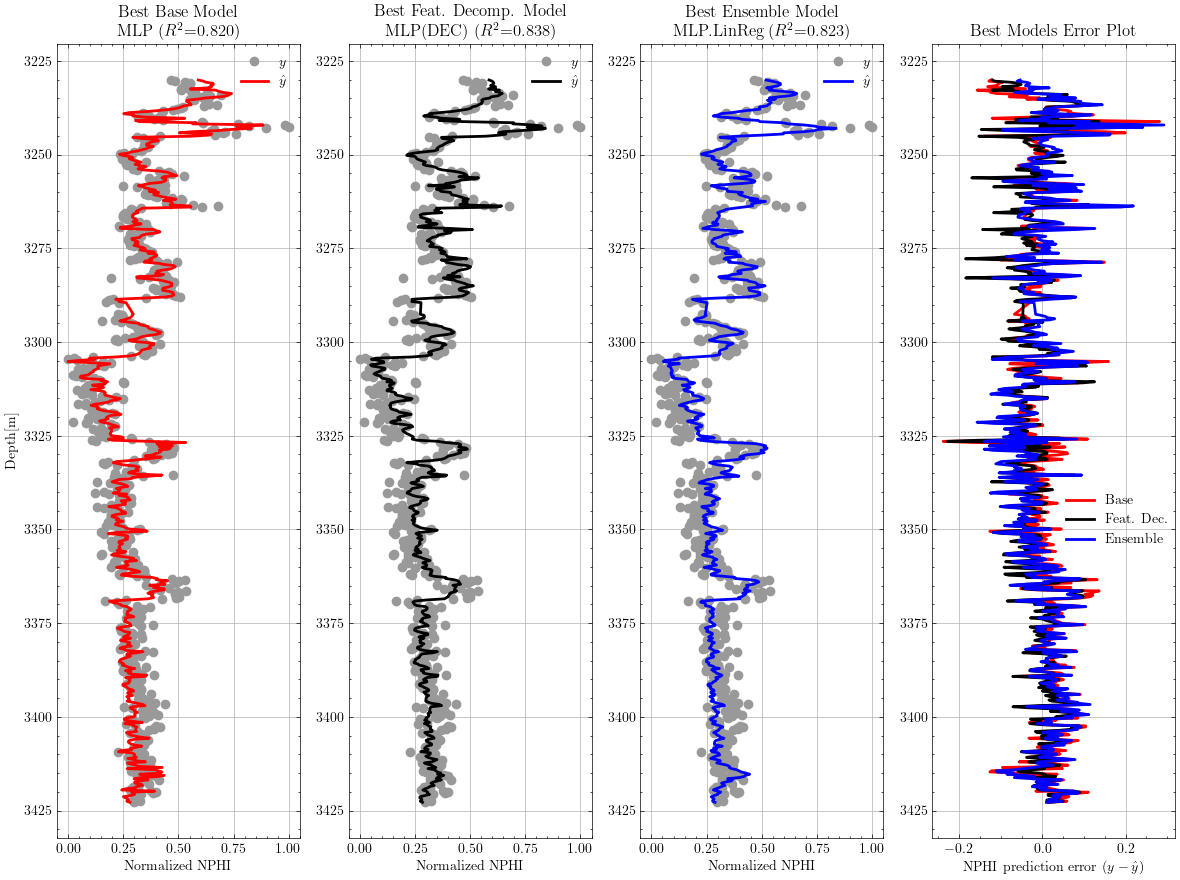

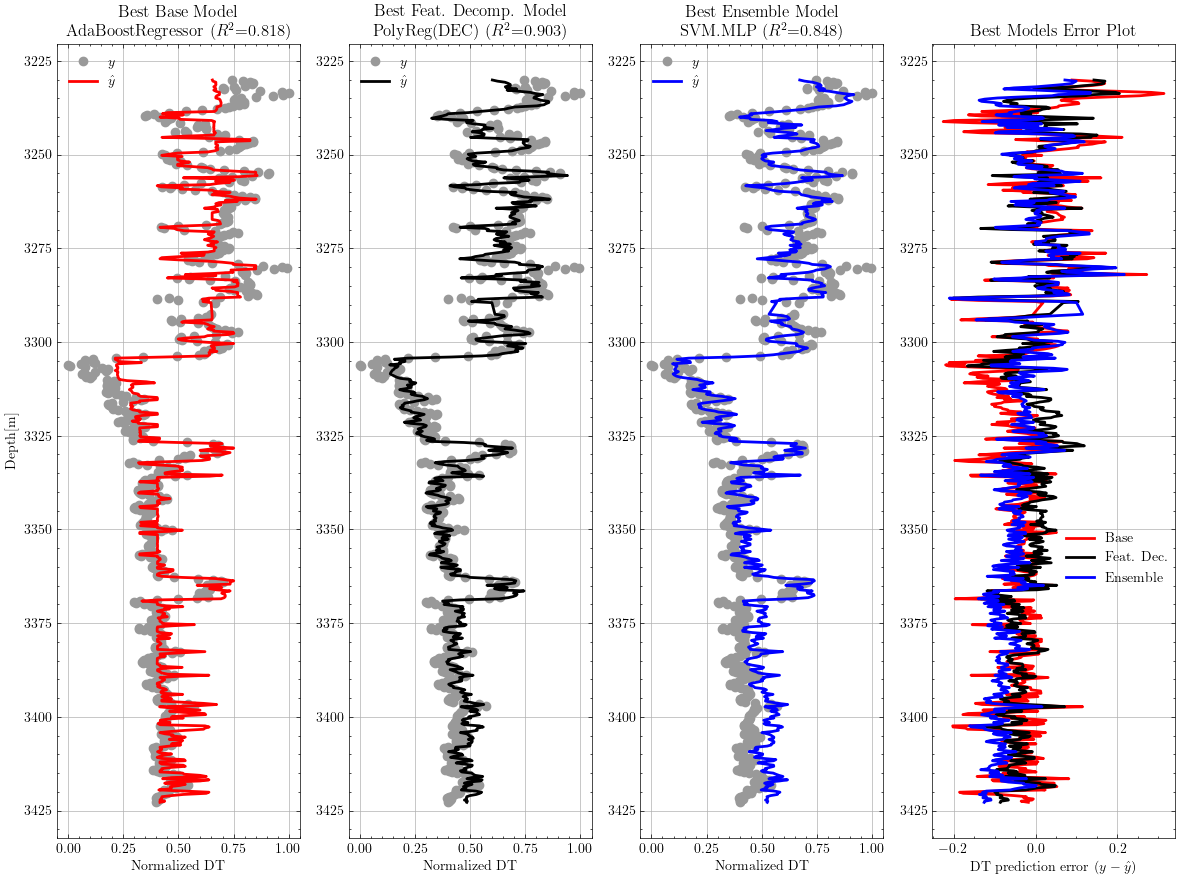

In [31]:
depth_range = [None,None]
for variable in df_sum_class['OUT'].unique():
    dftemp = df_sum_class[df_sum_class['OUT'] == variable]
    dftemp = dftemp.sort_values(['CASE']).reset_index(drop=True)

    base_row = dftemp.loc[0,:]
    featdec_row = dftemp.loc[2,:]
    ensemble_row = dftemp.loc[1,:]

    y_hat_base = base_row['y_pred']
    y_hat_featdec = featdec_row['y_pred']
    y_hat_hybrid = ensemble_row['y_pred']
    # y_hat_base = base_row['MODEL_OBJ'].predict(data_dict[variable][0])
    # y_hat_featdec = featdec_row['MODEL_OBJ'].predict(data_dict[variable][2])
    # y_hat_hybrid = ensemble_row['MODEL_OBJ'][0].predict(data_dict[variable][1].trend) + ensemble_row['MODEL_OBJ'][1].predict(data_dict[variable][1].seasonal+data_dict[variable][1].resid)

    fig, ax = plt.subplots(1,4, figsize=(12,9))

    y_real = data_dict[variable][-2].ravel()
    depth  = data_dict[variable][-1]

    plt.subplot(141)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_base, depth, 'r', lw=2, label='$\hat{y}$')
    plt.title(f'Best Base Model \n {base_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_base):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylabel('Depth[m]')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(142)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_featdec, depth, 'k', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Best Feat. Decomp. Model \n {featdec_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_featdec):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(143)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_hybrid,  depth, 'b', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Best Ensemble Model \n {ensemble_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_hybrid):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(144)
    plt.plot(y_real - y_hat_base, depth, 'r', lw=2, label='Base')
    plt.plot(y_real - y_hat_featdec, depth, 'k', lw=2, label='Feat. Dec.')
    plt.plot(y_real - y_hat_hybrid, depth, 'b', lw=2, label='Ensemble')
    plt.gca().invert_yaxis()
    plt.title('Best Models Error Plot')
    plt.xlabel(f'{variable}' + ' prediction error ($y-\hat{y}$)')
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(0.5, 0.4))

    plt.tight_layout()
    plt.ylim(depth_range)

    fig.savefig(f'./Images/pred_{variable}_science_short_err.pdf', format='pdf')

In [32]:
filt = [
'OUT',
'CASE',
'MODEL',
'R2_TR',
'R2_TE',
'RMSE_TR',
'RMSE_TE',
'train_time',
]
df_sum_class[filt].round(5).to_clipboard()

In [33]:
idx = df_results.groupby(['OUT', 'ESTIMATOR'])['R2_TE'].idxmax()
df_best_estim = df_results.loc[idx]

df_best_estim

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT,y_pred,y_test,train_time
17,ENSEMBLE,AdaBoostRegressor.SVM,AdaBoostRegressor,0.836428,0.840124,0.087469,0.073701,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6370593383449935, 0.6441645217094494, 0.665...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.310521
273,FEAT_DEC,GradientBoosting(DEC),GradientBoosting,0.983762,0.746783,0.027559,0.092753,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.5957501411822838, 0.6134204642053506, 0.634...","[0.7435146946794435, 0.7929273084479367, 0.824...",2.847176
51,ENSEMBLE,LinReg.SVM,LinReg,0.836835,0.818712,0.087360,0.078481,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6108200494135395, 0.6287381436873198, 0.660...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.004759
97,FEAT_DEC,MLP(DEC),MLP,0.865676,0.796644,0.079264,0.083121,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6523320970413273, 0.6763319585638756, 0.711...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.806939
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6008521766614161, 0.6233392866595034, 0.658...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.007272
88,FEAT_DEC,RandomForest(DEC),RandomForest,0.967020,0.800433,0.039276,0.082343,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6336279280431556, 0.6347463749475852, 0.639...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.767513
2,ENSEMBLE,SVM.MLP,SVM,0.844872,0.847915,0.085181,0.071883,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.671733967152614, 0.6936098868541649, 0.7303...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.238157
60,BASE,XGBoost,XGBoost,0.910483,0.811805,0.064707,0.079962,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6662895, 0.6642622, 0.7439971, 0.7320909, 0...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.027419
262,ENSEMBLE,AdaBoostRegressor.LinReg,AdaBoostRegressor,0.810100,0.749518,0.061448,0.066497,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.4762610516582552, 0.5110866069377897, 0.543...","[0.4659057652911911, 0.4840503365525314, 0.528...",0.195866
264,ENSEMBLE,GradientBoosting.SVM,GradientBoosting,0.904447,0.749275,0.043588,0.066529,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5665097775496208, 0.5760670219298459, 0.579...","[0.4659057652911911, 0.4840503365525314, 0.528...",1.222146


(CASE
 ENSEMBLE    14
 FEAT_DEC    10
 BASE         8
 Name: count, dtype: int64,
 CASE
 ENSEMBLE    0.4375
 FEAT_DEC    0.3125
 BASE        0.2500
 Name: proportion, dtype: float64,
 0.875,
 0.75,
 0.875,
 0.5)

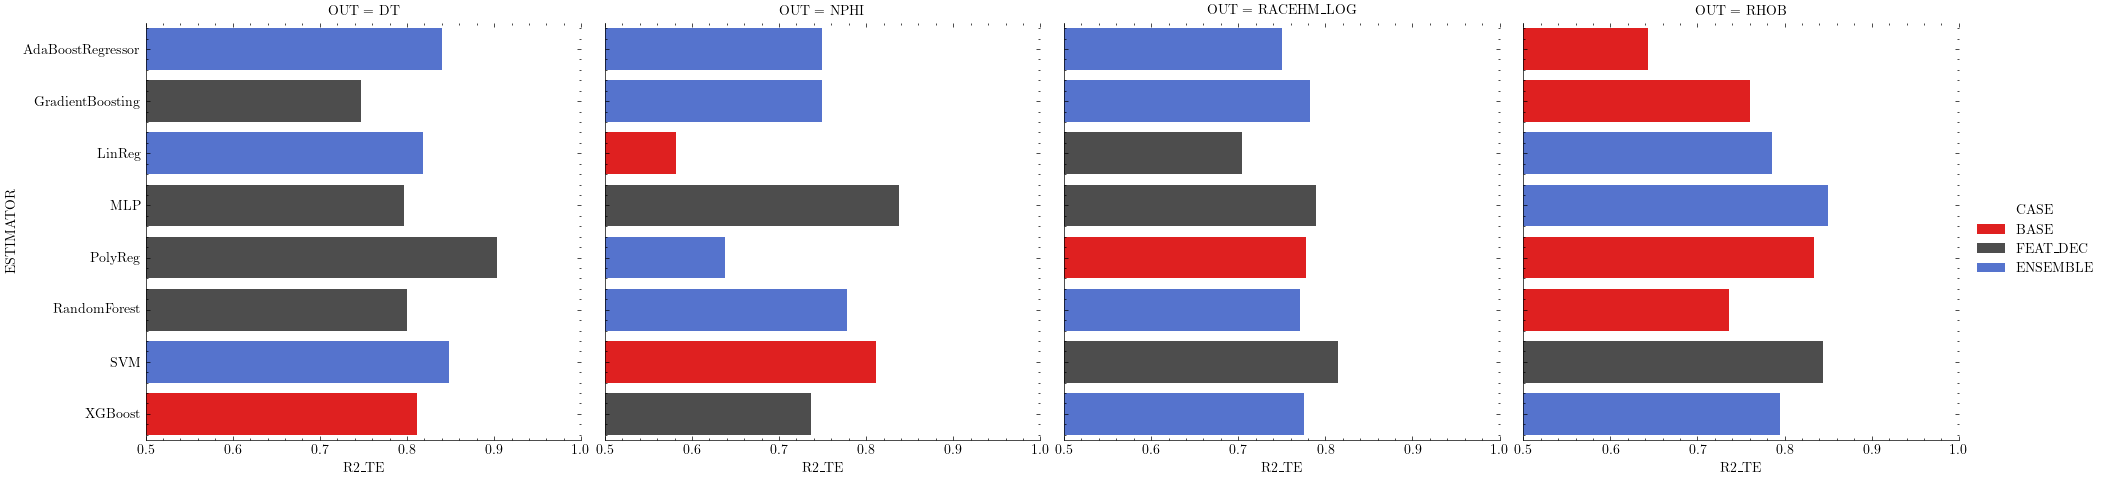

In [34]:
sns.catplot(data=df_best_estim, y='ESTIMATOR', x='R2_TE', hue='CASE', col='OUT', kind='bar', hue_order=['BASE', 'FEAT_DEC', 'ENSEMBLE'], palette=myPalette)
plt.xlim([0.5,1])
df_best_estim['CASE'].value_counts(), df_best_estim['CASE'].value_counts(normalize=True), 7/8, 6/8, 7/8, 4/8

heatmap dos vencedores

In [37]:
df_best_estim_pivot_r2 = df_best_estim.pivot(columns='OUT', values='R2_TE', index='ESTIMATOR')
df_best_estim_pivot_r2

OUT,DT,NPHI,RACEHM_LOG,RHOB
ESTIMATOR,,,,
AdaBoostRegressor,0.840124,0.749518,0.749841,0.643324
GradientBoosting,0.746783,0.749275,0.782489,0.760834
LinReg,0.818712,0.581893,0.704794,0.786024
MLP,0.796644,0.838061,0.788846,0.850101
PolyReg,0.903419,0.638045,0.777609,0.833406
RandomForest,0.800433,0.778552,0.770643,0.736613
SVM,0.847915,0.811180,0.814786,0.843549
XGBoost,0.811805,0.737099,0.775985,0.794570


In [83]:
# an = np.asarray([['    ']*4]*8)
# an[4,0] = 'Best'
# an[3,1] = 'Best'
# an[6,2] = 'Best'
# an[3,3] = 'Best'
# an

In [132]:
# np.set_printoptions(precision=3, floatmode='fixed')
anr2 = df_best_estim_pivot_r2.values.round(2)
# anr2 = np.round(anr2,2)
anr2 = anr2.astype('str')
anr2[4,0] += ' (Best)'
anr2[3,1] += ' (Best)'
anr2[6,2] += ' (Best)'
anr2[3,3] += ' (Best)'
anr2

array([['0.84', '0.75', '0.75', '0.64'],
       ['0.75', '0.75', '0.78', '0.76'],
       ['0.82', '0.58', '0.7', '0.79'],
       ['0.8', '0.84 (Best)', '0.79', '0.85 (Best)'],
       ['0.9 (Best)', '0.64', '0.78', '0.83'],
       ['0.8', '0.78', '0.77', '0.74'],
       ['0.85', '0.81', '0.81 (Best)', '0.84'],
       ['0.81', '0.74', '0.78', '0.79']], dtype='<U32')

In [171]:
myPalette = ['r', '0.6', '#4189E1']

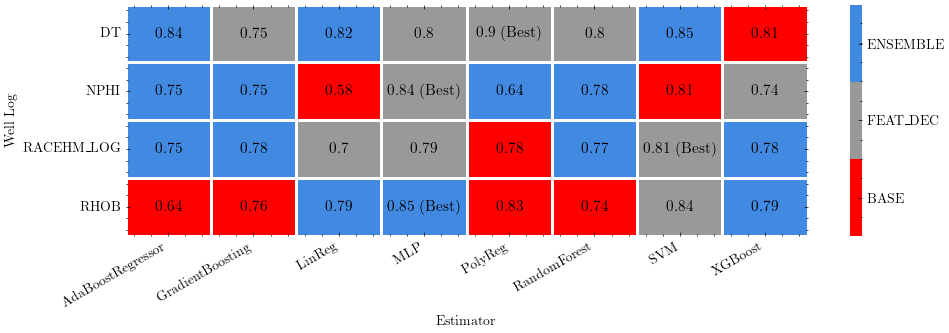

In [172]:
df_best_estim_pivot = df_best_estim.pivot(columns='OUT', values='CASE', index='ESTIMATOR')
df_best_estim_pivot.replace({j:i for i,j in enumerate(['BASE', 'FEAT_DEC', 'ENSEMBLE'])}, inplace=True)

vmin = 0.33
vmax = 1.66

fig = plt.figure(figsize=(11,3))
ax = sns.heatmap(df_best_estim_pivot.T, cmap=myPalette, linewidths=1, annot=anr2.transpose(), fmt='s', annot_kws={'fontweight':'extra bold', 'size':11, 'color':'k'})
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([vmin,1,vmax])
colorbar.set_ticklabels(['BASE', 'FEAT_DEC', 'ENSEMBLE'])

plt.ylabel('Well Log')
plt.xlabel('Estimator')
plt.xticks(rotation=30, ha='right')

fig.savefig(f'./Images/heatmap_best_estimators.pdf', format='pdf')